In [123]:
#Question 1:: Use a Python notebook & Load the dataset

In [124]:
import warnings 
warnings.filterwarnings('ignore')

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from scipy import stats

In [126]:
# Question 2:: It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. (2.5 points)
pd_df = pd.read_csv("parkinsons.data")
print(pd_df.info())
print(pd_df.describe())
print("The shape of the data frame is",pd_df.shape)
#There are no null values in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

The below distplot shows the distribution of the MDVP:Fo(Hz), MDVP:Fhi(Hz) and MDVP:Flo(Hz) data.


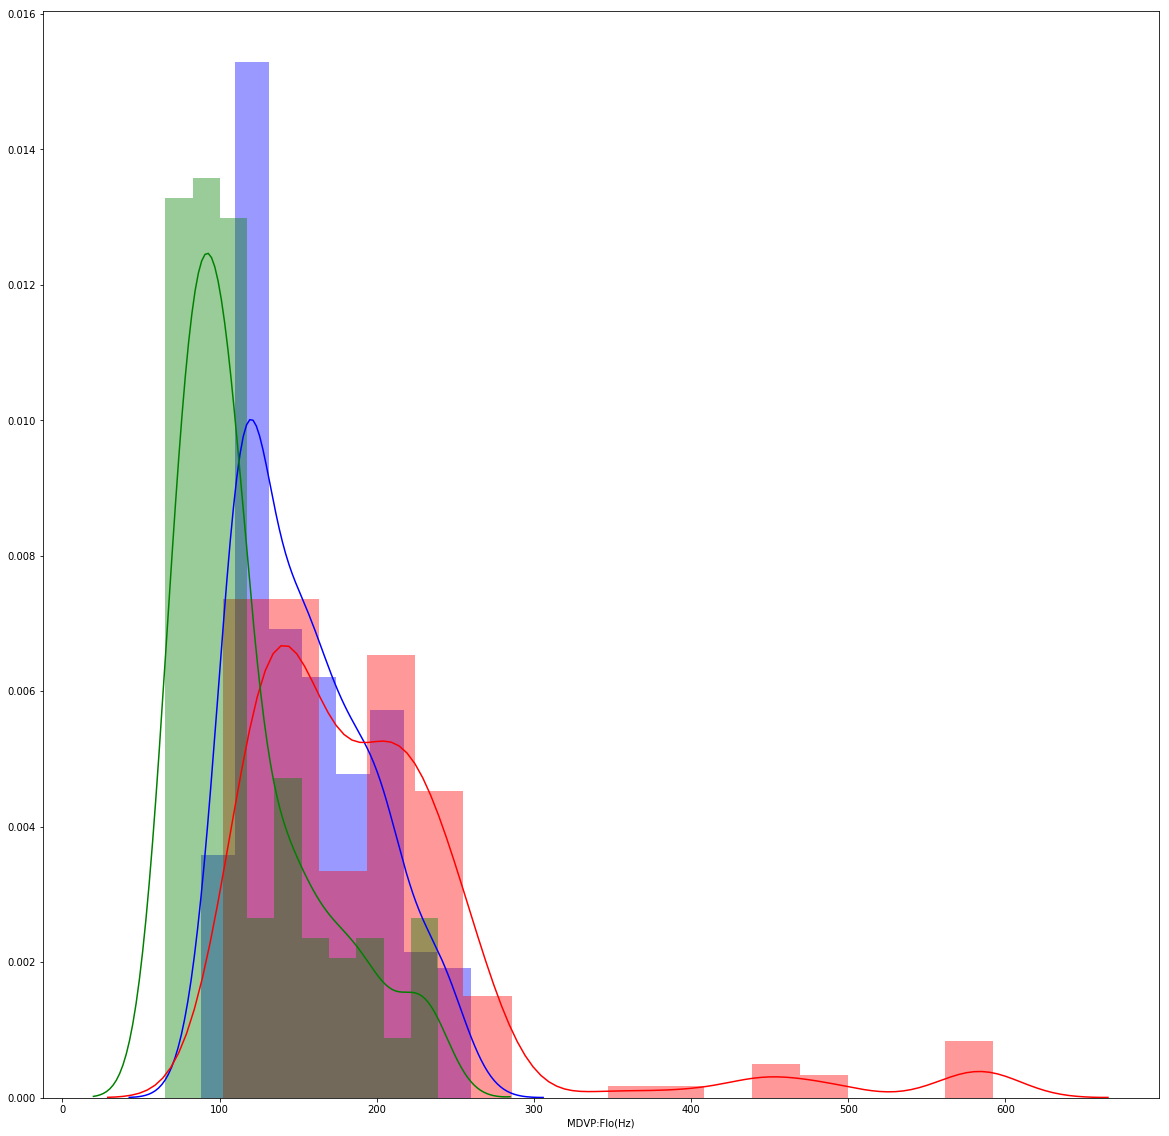

The max value of MDVP:Fo(Hz) is 260.105, and min value is 88.333
The max value of MDVP:Fhi(Hz) is 592.03, and min value is 102.145
The max value of MDVP:Flo(Hz) is 239.17, and min value is 65.476


In [127]:
#Question 3:: Using univariate & bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)
print("The below distplot shows the distribution of the MDVP:Fo(Hz), MDVP:Fhi(Hz) and MDVP:Flo(Hz) data.")
plt.figure(figsize=(20,20))
sns.distplot( pd_df["MDVP:Fo(Hz)"], color = 'b')
sns.distplot( pd_df["MDVP:Fhi(Hz)"], color = 'r')
sns.distplot( pd_df["MDVP:Flo(Hz)"], color = 'g')
plt.show()
print("The max value of MDVP:Fo(Hz) is {}, and min value is {}".format(pd_df["MDVP:Fo(Hz)"].max(),pd_df["MDVP:Fo(Hz)"].min()))
print("The max value of MDVP:Fhi(Hz) is {}, and min value is {}".format(pd_df["MDVP:Fhi(Hz)"].max(),pd_df["MDVP:Fhi(Hz)"].min()))
print("The max value of MDVP:Flo(Hz) is {}, and min value is {}".format(pd_df["MDVP:Flo(Hz)"].max(),pd_df["MDVP:Flo(Hz)"].min()))
#The blue line in distplot refers to MDVP average, while red and green line refers to MDVP high and MDVP low respectively.

In this test report with the sample data of 195, 75.38 % represent a positive case of parkinson's disease.
status
0     48
1    147
dtype: int64


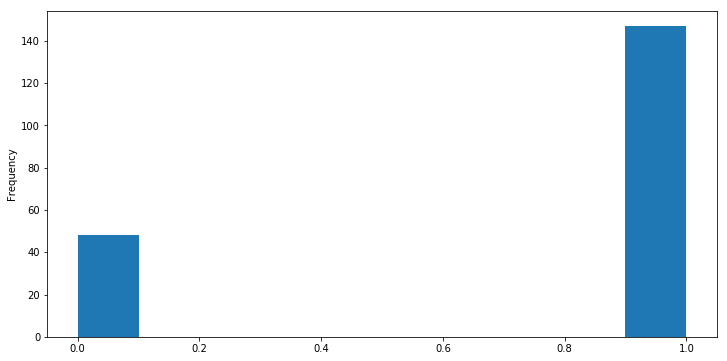

In [128]:
#Plotting the histogram of the status(Dependent variable). The graph represents the frequency of parkinson's disease.
#This variable depicts the final status of the test. 1 represents a positive case of parkinson's disease whereas
# 0 represents healthy case.
print("In this test report with the sample data of 195, 75.38 % represent a positive case of parkinson's disease.")
pd_df['status'].plot(kind='hist', figsize=[12,6])
print(pd_df.groupby(['status']).size())

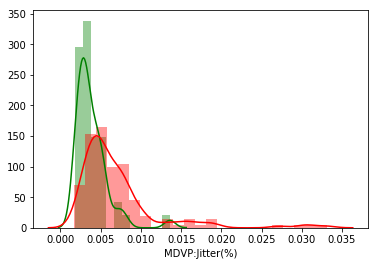

The below graph shows that for lesser value of MDVP:Jitter(%), there is more chance of happening of parkinson's disease


In [129]:
#Comparing the results of various measures.
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:Jitter(%)'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:Jitter(%)'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:Jitter(%), there is more chance of happening of parkinson's disease")


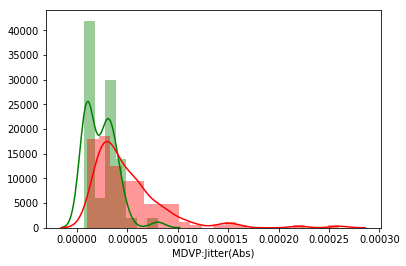

The below graph shows that for lesser value of MDVP:Jitter(Abs), there is more chance of happening of parkinson's disease


In [130]:
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:Jitter(Abs)'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:Jitter(Abs)'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:Jitter(Abs), there is more chance of happening of parkinson's disease")

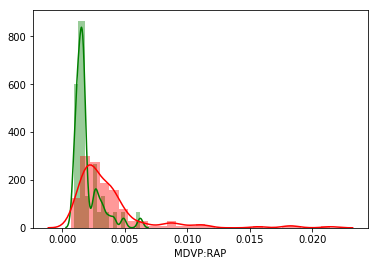

The below graph shows that for lesser value of MDVP:RAP, there is more chance of happening of parkinson's disease


In [131]:
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:RAP'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:RAP'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:RAP, there is more chance of happening of parkinson's disease")

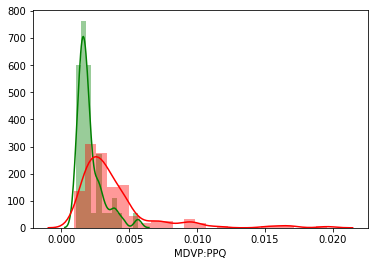

The below graph shows that for lesser value of MDVP:PPQ, there is more chance of happening of parkinson's disease


In [132]:
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:PPQ'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:PPQ'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:PPQ, there is more chance of happening of parkinson's disease")

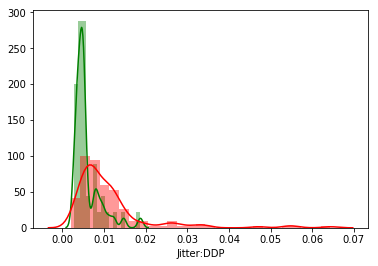

The below graph shows that for lesser value of Jitter:DDP, there is more chance of happening of parkinson's disease


In [133]:
sns.distplot( pd_df[pd_df["status"] == 0]['Jitter:DDP'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['Jitter:DDP'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of Jitter:DDP, there is more chance of happening of parkinson's disease")

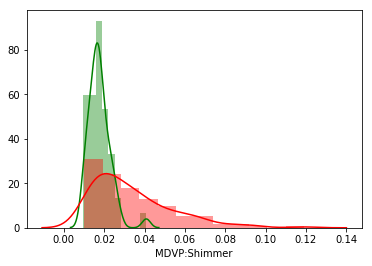

The below graph shows that for lesser value of MDVP:Shimmer, there is more chance of happening of parkinson's disease


In [134]:
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:Shimmer'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:Shimmer'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:Shimmer, there is more chance of happening of parkinson's disease")

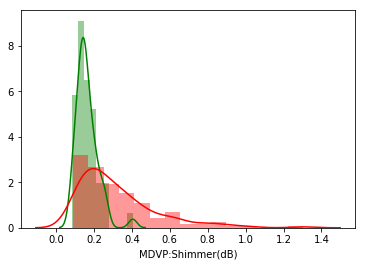

The below graph shows that for lesser value of MDVP:Shimmer(dB), there is more chance of happening of parkinson's disease


In [135]:
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:Shimmer(dB)'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:Shimmer(dB)'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:Shimmer(dB), there is more chance of happening of parkinson's disease")

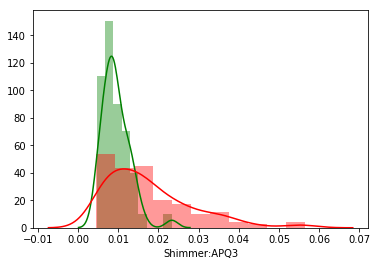

The below graph shows that for lesser value of Shimmer:APQ3, there is more chance of happening of parkinson's disease


In [136]:
sns.distplot( pd_df[pd_df["status"] == 0]['Shimmer:APQ3'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['Shimmer:APQ3'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of Shimmer:APQ3, there is more chance of happening of parkinson's disease")

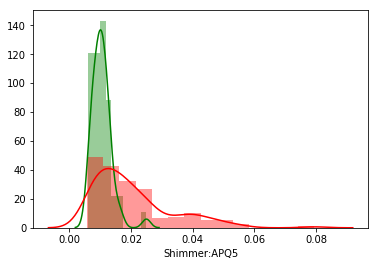

The below graph shows that for lesser value of Shimmer:APQ5, there is more chance of happening of parkinson's disease


In [137]:
sns.distplot( pd_df[pd_df["status"] == 0]['Shimmer:APQ5'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['Shimmer:APQ5'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of Shimmer:APQ5, there is more chance of happening of parkinson's disease")

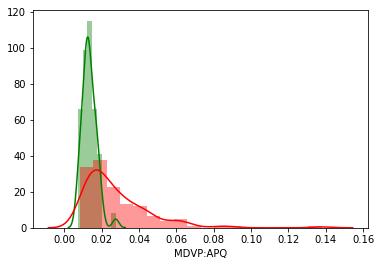

The below graph shows that for lesser value of MDVP:APQ, there is more chance of happening of parkinson's disease


In [138]:
sns.distplot( pd_df[pd_df["status"] == 0]['MDVP:APQ'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['MDVP:APQ'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of MDVP:APQ, there is more chance of happening of parkinson's disease")

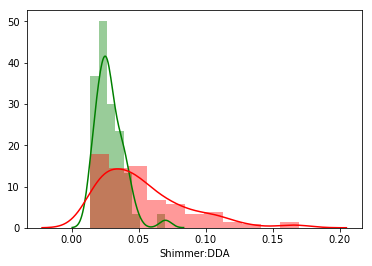

The below graph shows that for lesser value of Shimmer:DDA, there is more chance of happening of parkinson's disease


In [139]:
sns.distplot( pd_df[pd_df["status"] == 0]['Shimmer:DDA'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['Shimmer:DDA'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of Shimmer:DDA, there is more chance of happening of parkinson's disease")

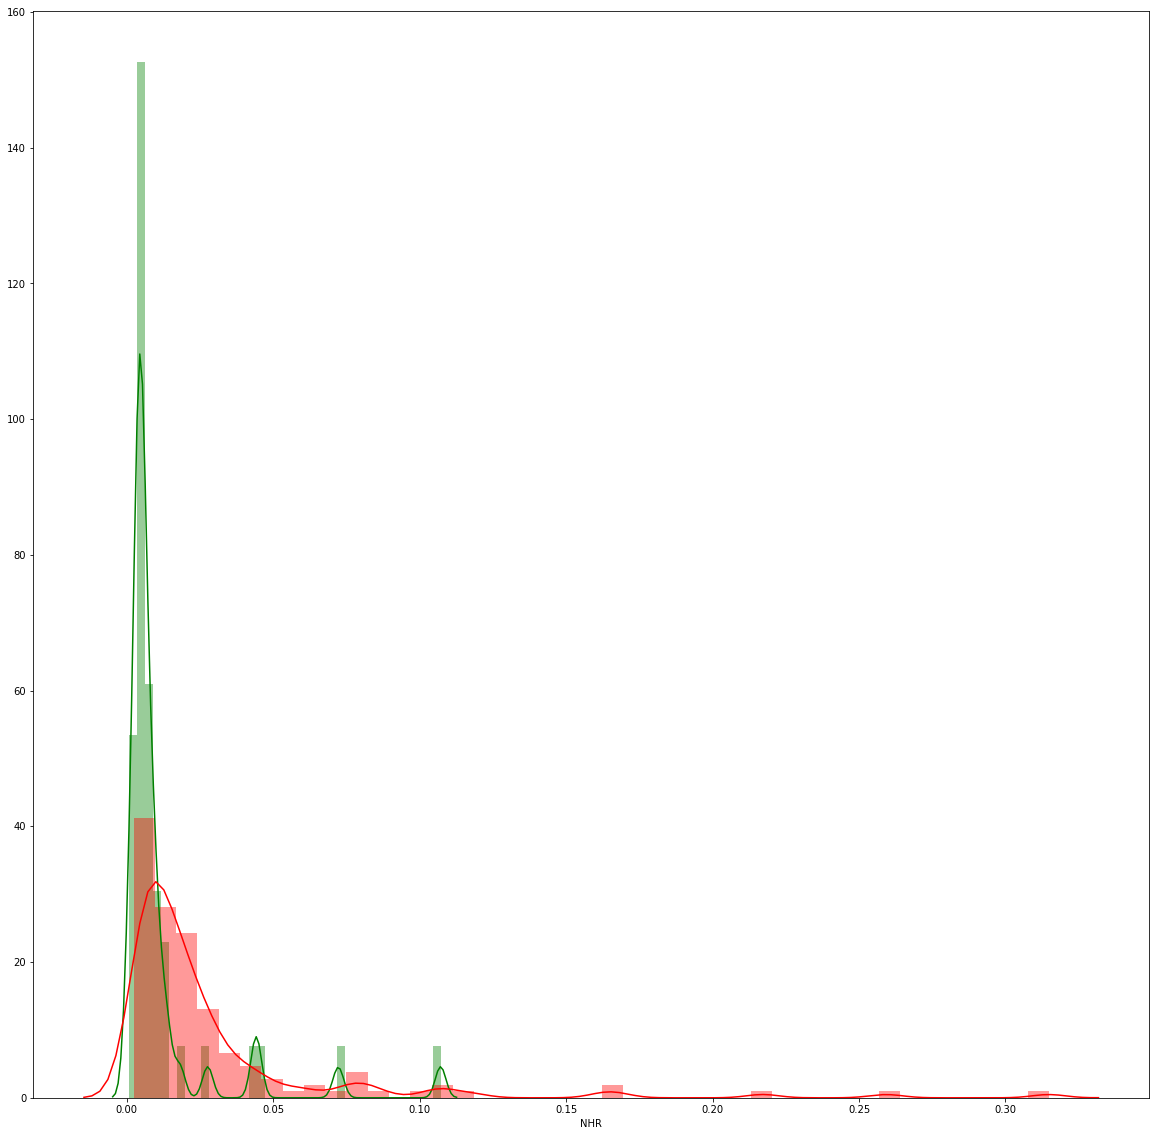

The below graph shows that for lesser value of NHR, there is more chance of happening of parkinson's disease


In [140]:
plt.figure(figsize=(20,20))
sns.distplot( pd_df[pd_df["status"] == 0]['NHR'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['NHR'], color = 'r')
plt.show()
print("The below graph shows that for lesser value of NHR, there is more chance of happening of parkinson's disease")

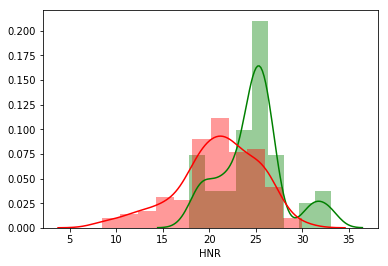

The graph shows that when the HNR value is between 15 and 30, there is high chance of happening of Prakinson's disease.


In [141]:
sns.distplot( pd_df[pd_df["status"] == 0]['HNR'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['HNR'], color = 'r')
plt.show()
print("The graph shows that when the HNR value is between 15 and 30, there is high chance of happening of Prakinson's disease.")

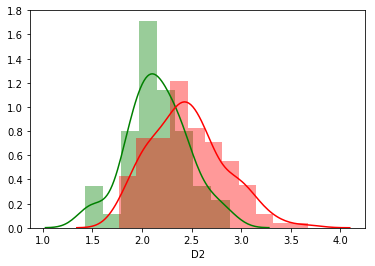

The graph shows that when the value of D2 lies in the range of 1.75 and 3.25, there is high chance of suffering from parkinson's disease.


In [142]:
sns.distplot( pd_df[pd_df["status"] == 0]['D2'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['D2'], color = 'r')
plt.show()
print("The graph shows that when the value of D2 lies in the range of 1.75 and 3.25, there is high chance of suffering from parkinson's disease.")

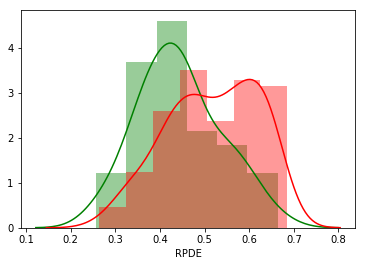

The graph shows that when the value of RPDE lies in the range of 0.35 and 0.7, there is high chance of suffering from parkinson's disease.


In [143]:
sns.distplot( pd_df[pd_df["status"] == 0]['RPDE'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['RPDE'], color = 'r')
plt.show()
print("The graph shows that when the value of RPDE lies in the range of 0.35 and 0.7, there is high chance of suffering from parkinson's disease.")

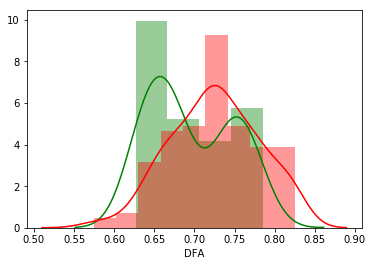

In [144]:
sns.distplot( pd_df[pd_df["status"] == 0]['DFA'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['DFA'], color = 'r')
plt.show()

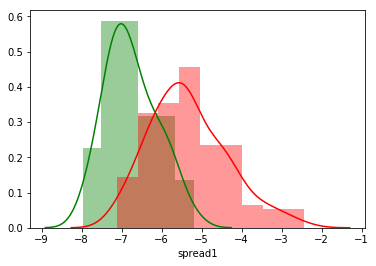

In [145]:
sns.distplot( pd_df[pd_df["status"] == 0]['spread1'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['spread1'], color = 'r')
plt.show()
#The frequency variation spread1 for parkinson's disease.

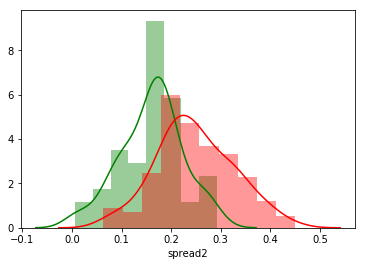

In [146]:
sns.distplot( pd_df[pd_df["status"] == 0]['spread2'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['spread2'], color = 'r')
plt.show()
#The frequency variation spread2 for parkinson's disease.

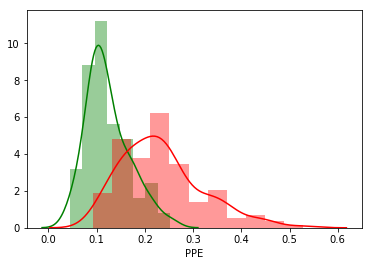

In [147]:
sns.distplot( pd_df[pd_df["status"] == 0]['PPE'], color = 'g')
sns.distplot( pd_df[pd_df["status"] == 1]['PPE'], color = 'r')
plt.show()
#The frequency variation PPE for parkinson's disease.

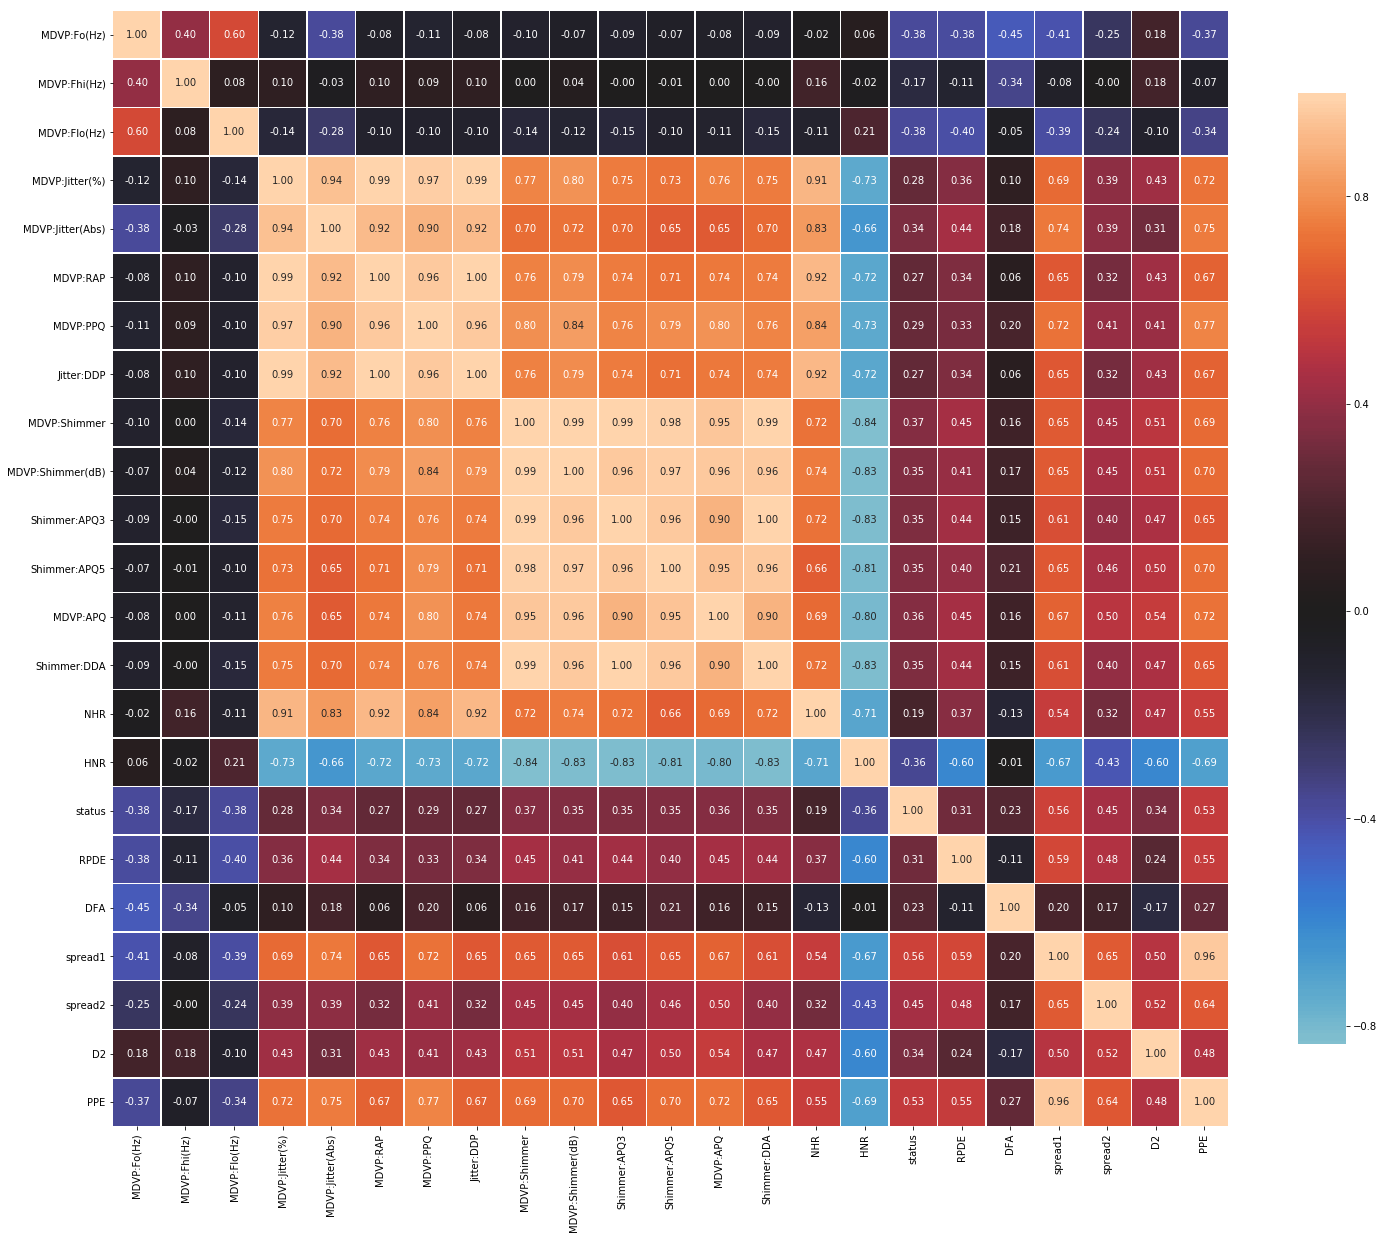

In [148]:
plt.figure(figsize=(25, 25))
sns.heatmap(pd_df.corr(), vmax=1.0, center=0, fmt='.2f', square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

In [149]:
# Create correlation matrix
corr_matrix = pd_df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print("The correlated attributes to be omitted",to_drop)
print(pd_df.columns)

The correlated attributes to be omitted ['MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE']
Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [150]:
#Question 4:: Split the dataset into training and test set in the ratio of 70:30 (Training:Test).

In [151]:
X = pd_df.drop(["name","status", 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'PPE'], axis=1)
#Since the standard deviation of binary values are not zero, hence subjecting all the independent attribues to zscore normalization
#Xnormalized = X.apply(zscore)
y = pd_df[["status"]]
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [152]:
#Question 5 ::Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [153]:
Dtc_model = DecisionTreeClassifier(criterion='entropy',random_state=0)
Dtc_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [154]:
#Question 6::Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a crosstab. (7.5 points)
ypred = Dtc_model.predict(X_test)
score = metrics.accuracy_score(y_test,ypred)
print("The accuracy score for Decision Tree Classifier is {}".format(score))
cm = metrics.confusion_matrix(y_test,ypred)
print("The confusion matrix is",cm)
print("Doing a cross tab on the y_test and y predicted values:::")
print(pd.crosstab(y_test["status"], ypred, margins=True, margins_name="Total"))
#The crosstab analysis shows that out of total 47 positive cases in Parkinson's test data, the model has predicted 39 cases
# as correct, whereas 8 positive cases are predicted wrong. Cross tab helps us do a comparative study between 
#test data and the predicted data.

The accuracy score for Decision Tree Classifier is 0.8305084745762712
The confusion matrix is [[10  2]
 [ 8 39]]
Doing a cross tab on the y_test and y predicted values:::
col_0    0   1  Total
status               
0       10   2     12
1        8  39     47
Total   18  41     59


In [155]:
# Question 7:: Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

# Create the parameter grid based on the results of random search 
param_grid = { 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10,15,16,20], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

dtc = DecisionTreeClassifier(criterion='entropy',random_state=0)
#Hyper parameter tuning for Decision tree classifier
grid_search = GridSearchCV(dtc, param_grid, scoring='f1', cv=5)
grid_obj = grid_search.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_
print(clf)
criterion = clf.criterion
maxDepth = clf.max_depth
minSamplesLeaf = clf.min_samples_leaf
print("The grid search cv gives us the following parameters:: max_depth = {}, min_samples_leaf = {} criterion = {}".format(maxDepth,minSamplesLeaf,criterion))

Dtc_model = DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=maxDepth,min_samples_leaf=minSamplesLeaf)
Dtc_model.fit(X_train,y_train)
ypred = Dtc_model.predict(X_test)
score = metrics.accuracy_score(y_test,ypred)
print("The accuracy score for Decision Tree Classifier with regularized parameter is {}".format(score))
cm = metrics.confusion_matrix(y_test,ypred)
print("The confusion matrix is",cm)
#The min_sample_leaf represents the minimum number of samples to be left at the node before a furthur split is made, 
#this value is default one. This is used mainly to smoothen the model.

#The max_depth prevents the tree to expand completely, this prevents the model to become overfit.

#Regularization helps to solve over fitting problem in machine learning. 
#Simple model will be a very poor generalization of data. 
#At the same time, complex model may not perform well in test data due to over fitting. 
#We need to choose the right model in between simple and complex model. 
#Regularization helps to choose preferred model complexity, so that model is better at predicting. 
#Regularization is nothing but adding a penalty term to the objective function and control the model complexity
#using that penalty term. It can be used for many machine learning algorithms.

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')
The grid search cv gives us the following parameters:: max_depth = 5, min_samples_leaf = 5 criterion = gini
The accuracy score for Decision Tree Classifier with regularized parameter is 0.8813559322033898
The confusion matrix is [[ 9  3]
 [ 4 43]]


In [156]:
#Question 8:: Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)
param_grid = {'n_estimators': [4, 6, 9, 12, 15, 18, 20 ], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10,15,16,20], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,5,8]
             }

rfc = RandomForestClassifier()
#Hyper parameter tuning for Random forest classifier
grid_search = GridSearchCV(rfc, param_grid, scoring='f1', cv=5)
grid_obj = grid_search.fit(X_train, y_train)
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_
print(clf)
criterion = clf.criterion
nEstimators = clf.n_estimators
maxDepth = clf.max_depth
minSamplesLeaf = clf.min_samples_leaf
print("The grid search cv gives us the following parameters:: n_estimators = {}, max_depth = {}, min_samples_leaf = {}, criterion = {}".format(nEstimators,maxDepth,minSamplesLeaf,criterion))
print("The optimal number of trees that gives the best result is {}".format(nEstimators))
Rf_model = RandomForestClassifier(n_estimators=nEstimators,criterion=criterion,random_state=0)
Rf_model.fit(X_train,y_train)
ypred = Rf_model.predict(X_test)
score = metrics.accuracy_score(y_test,ypred)
print(score)
cm = metrics.confusion_matrix(y_test,ypred)
print("The confusion matrix is",cm)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=16, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=12, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
The grid search cv gives us the following parameters:: n_estimators = 12, max_depth = 16, min_samples_leaf = 1, criterion = entropy
The optimal number of trees that gives the best result is 12
0.8983050847457628
The confusion matrix is [[ 8  4]
 [ 2 45]]
